# Visualization Data across Time

## Giới thiệu Data

In [42]:
import pandas as pd
import numpy as np 

In [43]:
# AirPassengersDates: Data hành khách trên một chuyến bay theo ngày.

passenger_df = pd.read_csv("AirPassengersDates.csv") 
passenger_df["Date"] = pd.to_datetime(passenger_df["Date"]) 
passenger_df.head()


,Date,#Passengers
0,1949-01-12,112
1,1949-02-24,118
2,1949-03-22,132
3,1949-04-05,129
4,1949-05-24,121


In [45]:
passenger_df['Date']

0     1949-01-12
1     1949-02-24
2     1949-03-22
3     1949-04-05
4     1949-05-24
         ...    
139   1960-08-16
140   1960-09-14
141   1960-10-20
142   1960-11-26
143   1960-12-04
Name: Date, Length: 144, dtype: datetime64[ns]

In [46]:
# Lấy day, month, day_name trong columns Date
passenger_df["month"] = passenger_df["Date"].dt.month
passenger_df["day"] = passenger_df["Date"].dt.day 
passenger_df["day_name"] = passenger_df["Date"].dt.day_name() 
passenger_df

,Date,#Passengers,month,day,day_name
0,1949-01-12,112,1,12,Wednesday
1,1949-02-24,118,2,24,Thursday
2,1949-03-22,132,3,22,Tuesday
3,1949-04-05,129,4,5,Tuesday
4,1949-05-24,121,5,24,Tuesday
...,...,...,...,...,...
139,1960-08-16,606,8,16,Tuesday
140,1960-09-14,508,9,14,Wednesday
141,1960-10-20,461,10,20,Thursday
142,1960-11-26,390,11,26,Saturday


In [51]:
# Option 2
# Xác định được hết quy tắc
# Từ đó dùng : regex, slience, datetime
passenger_df['Date_str'] = passenger_df['Date'].apply(lambda x: str(x))
passenger_df['Date_str']

0      1949-01-12 00:00:00
1      1949-02-24 00:00:00
2      1949-03-22 00:00:00
3      1949-04-05 00:00:00
4      1949-05-24 00:00:00
              ...         
139    1960-08-16 00:00:00
140    1960-09-14 00:00:00
141    1960-10-20 00:00:00
142    1960-11-26 00:00:00
143    1960-12-04 00:00:00
Name: Date_str, Length: 144, dtype: object

In [55]:
import re

y, m, d, _, _ , _ = re.findall('\d+', '1949-01-12 00:00:00')
y, m, d = int(y), int(m), int(d)
y, m, d

(1949, 1, 12)

In [63]:
# library: datetime
from datetime import datetime

print(datetime.utcnow())

# timestamp
# 
# Bắt đầu từ năm 1970.
print(datetime.timestamp(datetime.now()))

print(datetime.timestamp(datetime.utcnow()))

# chuyển đổi từ timestamp -> datetime
datetime.fromtimestamp(1638083780)


2021-11-28 07:26:31.089877
1638084391.090273
1638084391.09042


datetime.datetime(2021, 11, 28, 7, 16, 20)

In [70]:
# String to datetime
test = datetime.strptime('20211128', '%Y%m%d')
test

datetime.datetime(2021, 11, 28, 0, 0)

In [71]:
# Datetime to string
datetime.strftime(test, '%Y/%m/%d')

'2021/11/28'

## Sum, mean, median passenger hằng tháng

In [5]:
# SUM
# option 1
passenger_per_month = passenger_df.groupby(["month"])[["#Passengers"]].agg("sum") # agg : aggregate
passenger_per_month = passenger_per_month.reset_index() 
passenger_per_month.head() 

,month,#Passengers
0,1,2901
1,2,2820
2,3,3242
3,4,3205
4,5,3262


In [72]:
# Sum
# Option 2
passenger_df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [75]:
groupby_sum  = []
for month in passenger_df['month'].unique():
    sum_passengers = passenger_per_month.query(f"month=={month}")['#Passengers'].sum()

    #groupby_sum.append({'month' : month, '#Passengers' : sum_passengers})
    groupby_sum.append(sum_passengers)

# pd.DataFrame(groupby_sum)
df_new = pd.DataFrame()
df_new['month'] = passenger_df['month'].unique()
df_new['#Passengers'] = groupby_sum
df_new

,month,#Passengers
0,1,2901
1,2,2820
2,3,3242
3,4,3205
4,5,3262
5,6,3740
6,7,4216
7,8,4213
8,9,3629
9,10,3199


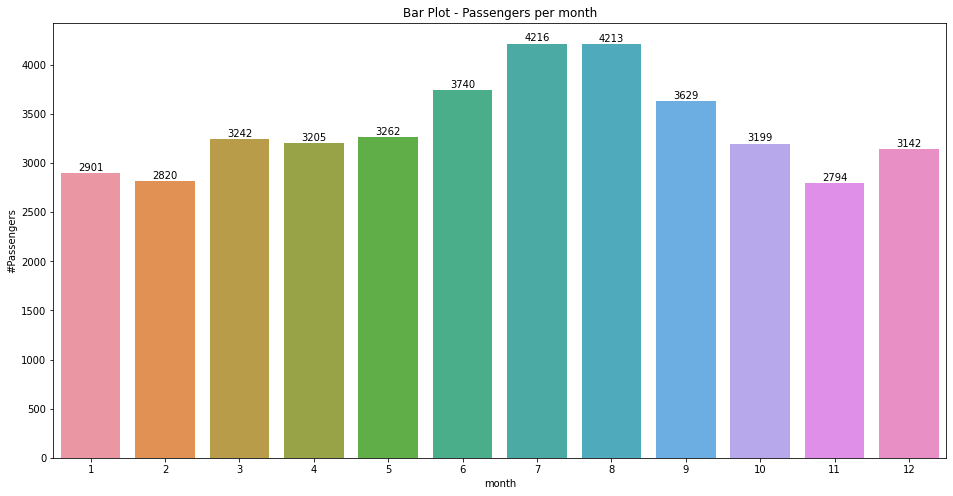

In [76]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(16,8))

ax = sns.barplot(x="month",y="#Passengers", data=passenger_per_month) 
ax.set_title("Bar Plot - Passengers per month")

#Annotate the bars with value to have better 
for p, v in zip(ax.patches, passenger_per_month['#Passengers']): 
    height = p.get_height() 
    ax.text(p.get_x() + p.get_width() / 2, height + 5, v, 
            ha='center', va='bottom') 
plt.show()

In [13]:
# Mean # Tương tự như Sum
mean_passengers_per_month = passenger_df.groupby(["month"])[["#Passengers"]].agg("mean").reset_index()
mean_passengers_per_month.head()

,month,#Passengers
0,1,241.750000
1,2,235.000000
2,3,270.166667
3,4,267.083333
4,5,271.833333


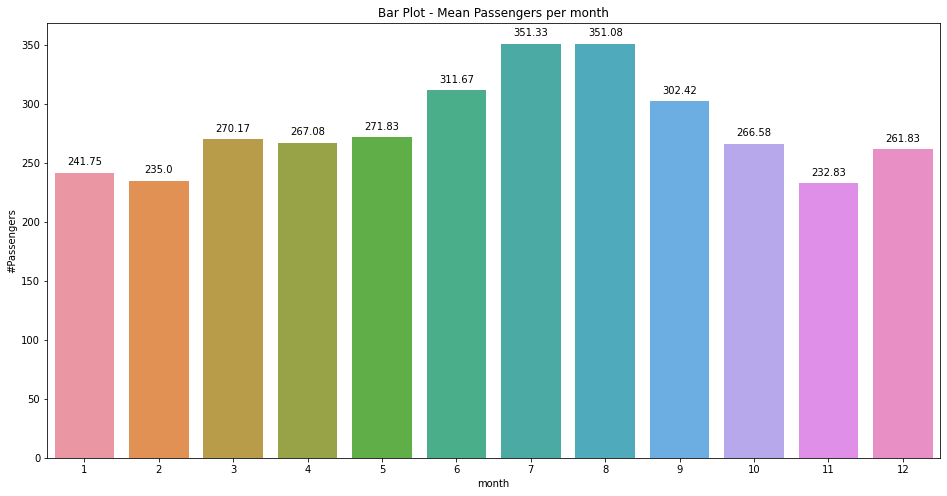

In [80]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(16,8))

ax = sns.barplot(x="month",y="#Passengers", data=mean_passengers_per_month) 
ax.set_title("Bar Plot - Mean Passengers per month")

#Annotate the bars with value to have better 
for p, v in zip(ax.patches, mean_passengers_per_month['#Passengers']): 
    height = p.get_height() 
    ax.text(p.get_x() + p.get_width() / 2, height + 5, round(v, 2), 
            ha='center', va='bottom') 
plt.show()

In [14]:
# Median
median_passengers_per_month = passenger_df.groupby(["month"])[["#Passengers"]].agg("median").reset_index()
median_passengers_per_month.head()

,month,#Passengers
0,1,223.0
1,2,214.5
2,3,251.5
3,4,252.0
4,5,252.0


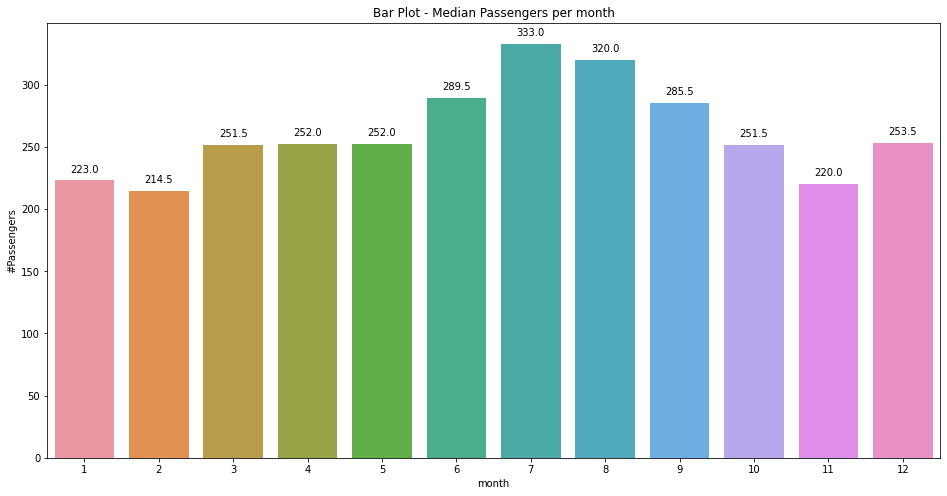

In [81]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(16,8))

ax = sns.barplot(x="month",y="#Passengers", data=median_passengers_per_month) 
ax.set_title("Bar Plot - Median Passengers per month")

#Annotate the bars with value to have better 
for p, v in zip(ax.patches, median_passengers_per_month['#Passengers']): 
    height = p.get_height() 
    ax.text(p.get_x() + p.get_width() / 2, height + 5, round(v, 2), 
            ha='center', va='bottom') 
plt.show()

## Mean abd standard

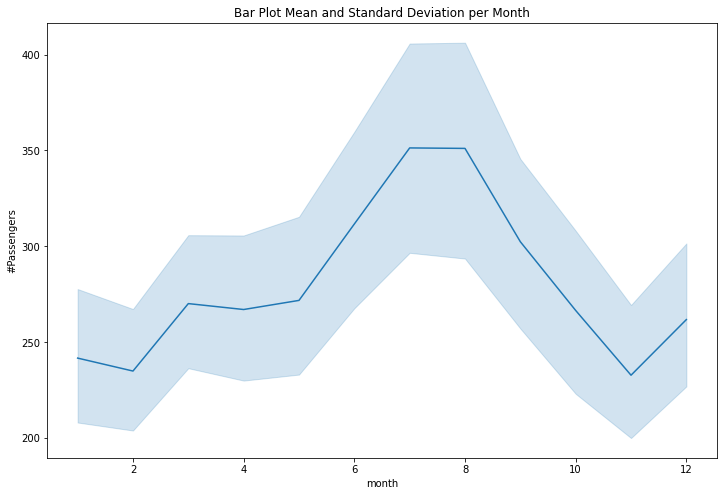

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

ax = sns.lineplot(x="month",y="#Passengers", data=passenger_df, ci=80)
ax.set_title("Bar Plot Mean and Standard Deviation per Month")
plt.show()

## Tính zscore
$$zscore=\frac{x-\bar{x}}{\sigma{(x)}}$$

$$\bar{x} = mean$$

$$\sigma{(x)} = standard-deviation$$

In [85]:
passenger_df = pd.read_csv("AirPassengersDates.csv") 
passenger_df.head() 

,Date,#Passengers
0,1949-01-12,112
1,1949-02-24,118
2,1949-03-22,132
3,1949-04-5,129
4,1949-05-24,121


In [86]:
# Chuyển về datetime
# pandas to_datetime
passenger_df["Date"] = pd.to_datetime(passenger_df["Date"])


In [87]:
# mean
passenger_df['mean'] = passenger_df["#Passengers"].mean() 
# std
passenger_df['std'] = passenger_df["#Passengers"].std() 

In [92]:
passenger_df['mean']

0      280.298611
1      280.298611
2      280.298611
3      280.298611
4      280.298611
          ...    
139    280.298611
140    280.298611
141    280.298611
142    280.298611
143    280.298611
Name: mean, Length: 144, dtype: float64

In [91]:
passenger_df['std']

0      119.966317
1      119.966317
2      119.966317
3      119.966317
4      119.966317
          ...    
139    119.966317
140    119.966317
141    119.966317
142    119.966317
143    119.966317
Name: std, Length: 144, dtype: float64

In [93]:
passenger_df

,Date,#Passengers,mean,std
0,1949-01-12,112,280.298611,119.966317
1,1949-02-24,118,280.298611,119.966317
2,1949-03-22,132,280.298611,119.966317
3,1949-04-05,129,280.298611,119.966317
4,1949-05-24,121,280.298611,119.966317
...,...,...,...,...
139,1960-08-16,606,280.298611,119.966317
140,1960-09-14,508,280.298611,119.966317
141,1960-10-20,461,280.298611,119.966317
142,1960-11-26,390,280.298611,119.966317


In [94]:
# zscore
passenger_df['zscore'] = (passenger_df["#Passengers"] - passenger_df['mean'])/passenger_df['std'] 
passenger_df['zscore']

0     -1.402882
1     -1.352868
2     -1.236169
3     -1.261176
4     -1.327861
         ...   
139    2.714940
140    1.898044
141    1.506268
142    0.914435
143    1.264533
Name: zscore, Length: 144, dtype: float64

In [96]:
# abs
passenger_df['zscore_abs'] = abs(passenger_df['zscore'])
passenger_df['zscore_abs']

0      1.402882
1      1.352868
2      1.236169
3      1.261176
4      1.327861
         ...   
139    2.714940
140    1.898044
141    1.506268
142    0.914435
143    1.264533
Name: zscore_abs, Length: 144, dtype: float64

In [24]:
passenger_df.sort_values(by="zscore_abs", ascending=False).head(100)

,Date,#Passengers,mean,std,zscore,zscore_abs
138,1960-07-02,622,280.298611,119.966317,2.848311,2.848311
139,1960-08-16,606,280.298611,119.966317,2.714940,2.714940
127,1959-08-01,559,280.298611,119.966317,2.323164,2.323164
126,1959-07-29,548,280.298611,119.966317,2.231471,2.231471
137,1960-06-02,535,280.298611,119.966317,2.123108,2.123108
...,...,...,...,...,...,...
111,1958-04-02,348,280.298611,119.966317,0.564337,0.564337
105,1957-10-27,347,280.298611,119.966317,0.556001,0.556001
79,1955-08-13,347,280.298611,119.966317,0.556001,0.556001
41,1952-06-21,218,280.298611,119.966317,-0.519301,0.519301


In [97]:
anamlous_df_high = passenger_df.sort_values(by="zscore", ascending=False).head(10)
anamlous_df_high["Date"] = pd.to_datetime(anamlous_df_high["Date"])

anamlous_df_low = passenger_df.sort_values(by="zscore", ascending=True).head(10)
anamlous_df_low["Date"] = pd.to_datetime(anamlous_df_low["Date"])

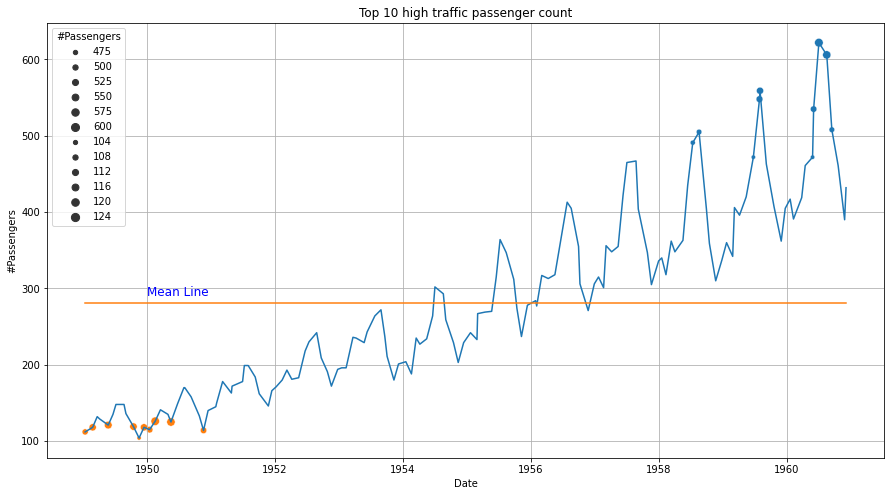

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.grid=True
plt.title("Top 10 high traffic passenger count")
ax = sns.lineplot(x="Date", y="#Passengers", data=passenger_df)
ax = sns.scatterplot(x="Date",y="#Passengers", data=anamlous_df_high, size="#Passengers")
ax = sns.lineplot(x="Date", y="mean", data=passenger_df)
ax.text(pd.to_datetime("1950"), 290, "Mean Line", horizontalalignment='left', size='large', color='Blue')
ax = sns.scatterplot(x="Date",y="#Passengers", data=anamlous_df_low, size="#Passengers")
ax.grid()

# Resample

upsampling : 

downsampling : 

In [ ]:
# dataset: walmart_store_openings

In [104]:
walmart_stores = pd.read_csv('1962_2006_walmart_store_openings.csv',  parse_dates=['date_super']).dropna()
walmart_stores.head()


,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
0,1,7/1/62,1997-03-01,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,8/1/64,1996-03-01,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,8/1/65,2002-03-01,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,10/1/67,1993-03-01,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
5,10,7/1/68,1998-03-01,1.0,40,21,2020 SOUTH MUSKOGEE,Tahlequah,OK,74464,Supercenter,35.923658,-94.97185,7,1,1968


In [100]:
len(walmart_stores)

1946

In [105]:
walmart_store_count = walmart_stores.groupby("YEAR")[["storenum"]].agg("count")\
                                    .rename(columns={"storenum": "store_count"})
walmart_store_count

,store_count
YEAR,
1962,1
1964,1
1965,1
1967,1
1968,5
1969,4
1970,4
1971,14
1972,13


In [108]:
# check
(walmart_stores['YEAR'] == 1989).sum()

86

In [109]:
walmart_store_count = pd.merge(walmart_stores, walmart_store_count, on="YEAR")
walmart_store_count

,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR,store_count
0,1,7/1/62,1997-03-01,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962,1
1,2,8/1/64,1996-03-01,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964,1
2,4,8/1/65,2002-03-01,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965,1
3,8,10/1/67,1993-03-01,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967,1
4,10,7/1/68,1998-03-01,1.0,40,21,2020 SOUTH MUSKOGEE,Tahlequah,OK,74464,Supercenter,35.923658,-94.97185,7,1,1968,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,5346,1/23/06,2006-01-23,0.0,37,1,1318 Mebane Oaks Rd,Mebane,NC,27302,Supercenter,36.111449,-79.27142,1,23,2006,33
1942,5313,1/23/06,2006-01-23,0.0,29,183,6100 Ronald Reagan Blvd,Lake Saint Louis,MO,63367,Supercenter,38.796601,-90.78525,1,23,2006,33
1943,5403,1/27/06,2006-01-27,0.0,17,19,100 S High Cross Rd,Urbana,IL,61802,Supercenter,40.121648,-88.17649,1,27,2006,33
1944,3347,1/23/06,2006-01-23,0.0,12,105,7450 Cypress Gardens Blvd,Winter Haven,FL,33884,Supercenter,27.997387,-81.68256,1,23,2006,33


In [119]:
walmart_store_count= walmart_store_count.set_index(pd.DatetimeIndex(walmart_store_count.date_super)) 


In [120]:
walmart_store_count = walmart_store_count[["date_super", "store_count"]] 
walmart_store_count.drop_duplicates(subset="date_super", inplace=True)
walmart_store_count

,date_super,store_count
date_super,,
1997-03-01,1997-03-01,1
1996-03-01,1996-03-01,1
2002-03-01,2002-03-01,1
1993-03-01,1993-03-01,1
1998-03-01,1998-03-01,5
...,...,...
2003-03-03,2003-03-03,63
2004-01-21,2004-01-21,90
2004-08-20,2004-08-20,90


In [122]:
# Conver tần số của data về 2 days
walmart_store_count_series = walmart_store_count.store_count
walmart_store_count_series = walmart_store_count_series.asfreq('2D')
walmart_store_count_series

date_super
1997-03-01     1.0
1997-03-03     NaN
1997-03-05     NaN
1997-03-07     NaN
1997-03-09     NaN
              ... 
2005-10-31     NaN
2005-11-02    60.0
2005-11-04     NaN
2005-11-06     NaN
2005-11-08     NaN
Freq: 2D, Name: store_count, Length: 1588, dtype: float64

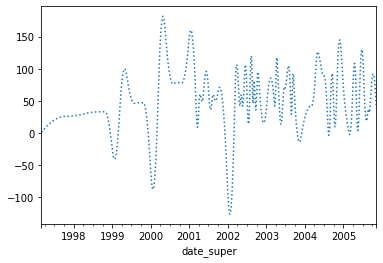

In [123]:
walmart_store_count_series = walmart_store_count_series.interpolate(method="spline", order=2) 
walmart_store_count_series.plot(style=":") 

In [126]:
help(walmart_store_count_series.resample)

Help on method resample in module pandas.core.generic:

resample(rule, axis=0, closed: Union[str, NoneType] = None, label: Union[str, NoneType] = None, convention: str = 'start', kind: Union[str, NoneType] = None, loffset=None, base: Union[int, NoneType] = None, on=None, level=None, origin: Union[str, ForwardRef('Timestamp'), datetime.datetime, numpy.datetime64, int, numpy.int64, float] = 'start_day', offset: Union[ForwardRef('Timedelta'), datetime.timedelta, numpy.timedelta64, int, numpy.int64, float, str, NoneType] = None) -> 'Resampler' method of pandas.core.series.Series instance
    Resample time-series data.
    
    Convenience method for frequency conversion and resampling of time
    series. Object must have a datetime-like index (`DatetimeIndex`,
    `PeriodIndex`, or `TimedeltaIndex`), or pass datetime-like values
    to the `on` or `level` keyword.
    
    Parameters
    ----------
    rule : DateOffset, Timedelta or str
        The offset string or object representing tar

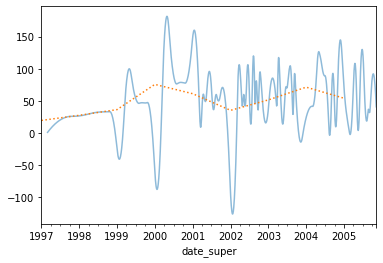

In [127]:
# BA : businees year
walmart_store_count_series.plot(alpha=0.5, style='-')
walmart_store_count_series.resample('BA').mean().plot(style=':')


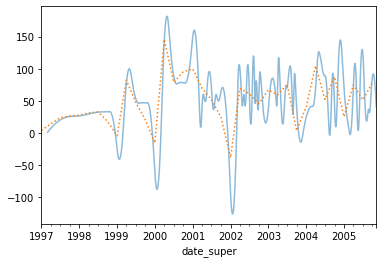

In [128]:
# BQ : business quarter
walmart_store_count_series.plot(alpha=0.5, style='-')
walmart_store_count_series.resample('BQ').mean().plot(style=':') 

# Using shift and tshift to Shift Time in Data

## Autocorrelation in Time Series

# Using Bokeh